In [1]:
import matplotlib.pyplot as plt
import hypertools as hyp
import numpy as np
import pandas as pd
%matplotlib inline
from matplotlib import animation, rc
from sklearn.decomposition import PCA
from IPython.display import HTML
import vdmtools as vdm
from vdmtools import printm

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
cd ratdata/R050-2014-04-02

/Users/youkitanaka/Documents/Github/hypertools-fork/sandbox_rats/ratdata/R050-2014-04-02


In [3]:
data = vdm.loadmat('spikes.mat')
S = data['spikes']
data = vdm.loadmat('lfpTH.mat')
runLFP = data['lfpTH']
data = vdm.loadmat('metadata.mat')
metadata = data['metadata']
data = vdm.loadmat('position.mat')
pos = data['position']

Try to figure out a way to convert an entire session worth's data into a single pandas dataframe for easy procesing and also useful format for hypertools (and other analysis modules) [See pic](https://goo.gl/photos/aRAHFzosiqCge99Z9)

In [29]:
lfp_tvec = runLFP['tvec']
lfp_data = list(runLFP['data'])
pos_data = list(pos['data'])
pos_tvec = pos['tvec']

In [53]:
np.size(lfp_tvec)
np.size(pos_tvec)
1/np.median(np.diff(lfp_tvec))
1/np.median(np.diff(pos_tvec))

9186304

133233

1999.9999995925464

30.040855563900905

In [14]:
left_trials = metadata['taskvars']['trial_iv_L']
right_trials = metadata['taskvars']['trial_iv_R']

In [22]:
printm(left_trials)
left_trials['tstart'][0]
left_trials['tend'][0]

     cfg            <class 'dict'> ['history']
  tstart   <class 'numpy.ndarray'> (15,)
    tend   <class 'numpy.ndarray'> (15,)


6141.6130149999999

6200.1031189999994

In [24]:
newS = vdm.restrict(S['t'],left_trials['tstart'][0],left_trials['tend'][0])

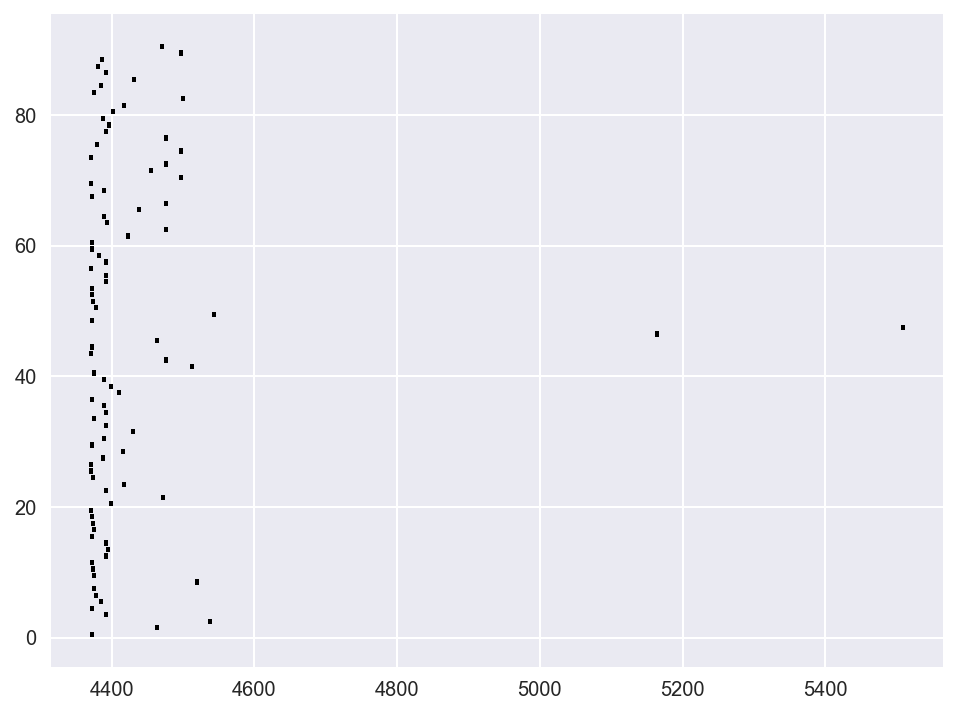

In [21]:
plt.figure(figsize=(8,6))
for i in range(np.size(newS)-1):
    plt.vlines(newS[i],0.1+i,0.9+i)
plt.show();

In [ ]:
fig,ax,data = hyp.plot(runL1,show=False,return_data=True)
ax.set_title('left trial 1')
plt.show()

In [ ]:
fig,ax,data,anim = hyp.plot([lfpL1],animate=1,show=False,return_data=True)
HTML(anim.to_html5_video())

In [ ]:
hyp.plot([lfpL1])

In [ ]:
runL_pca = PCA(n_components=3)
runL_pca.fit(runL1)
np.shape(runL_pca.components_)

In [ ]:
runL1_pca = np.dot(runL1.as_matrix(),np.transpose(runL_pca.components_))
runL2_pca = np.dot(runL2.as_matrix(),np.transpose(runL_pca.components_))
runR1_pca = np.dot(runR1.as_matrix(),np.transpose(runL_pca.components_))
replay_pca = np.dot(replayL1.as_matrix(),np.transpose(runL_pca.components_))

In [ ]:
fig,ax,data = hyp.plot([runL1_pca,runL2_pca],show=False,return_data=True,save_path='twotrials_same_eigvec')
ax.set_title('left trial 1 vs left trial 2 using trial 1 eigenvectors')
plt.show()

fig,ax,data = hyp.plot([runL1,runL2],show=False,return_data=True,save_path='twotrials')
ax.set_title('left trial 1 vs left trial 2 generated separated')
plt.show()

In [ ]:
fig,ax,data = hyp.plot([runL1_pca,runR1_pca],show=False,return_data=True)
ax.set_title('left trial 1 vs right trial 1 using same eigenvectors')
plt.show()

fig,ax,data = hyp.plot([runL1,runR1],show=False,return_data=True)
ax.set_title('left trial 1 vs right trial 1 generated separately')
plt.show()

In [ ]:
np.shape(runL1)
np.shape(lfpL1)